# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

#Reading the CSV file

In [ ]:
# load the csv file
df = pd.read_csv('BTCd.csv')

# Data Preprocessing

In [ ]:
# preprocess the data
data = df['Open'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
X, y = [], []
for i in range(50, len(data)):
    X.append(data[i-50:i, 0])
    y.append(data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Splitting testing and Training DataSet

In [ ]:
# split the data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model

In [ ]:
# build the LSTM RNN model
model = Sequential()
model.add(LSTM(96, input_shape=(X.shape[1], 1), activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(96, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(96, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(96, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1))

# Model Architecture

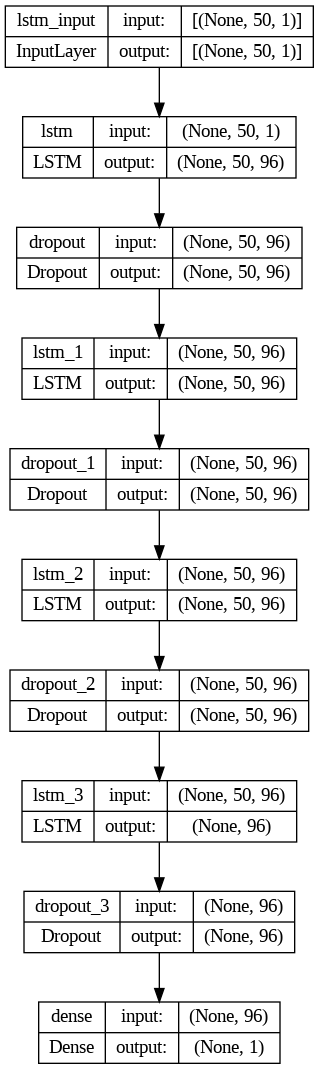

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Params Description of Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

# Compiling The Model

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mse')

# Model Training

In [ ]:
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
78/78 [==============================] - 17s 40ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 2/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 3/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0020 - val_loss: 0.0066
Epoch 4/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0021 - val_loss: 0.0116
Epoch 5/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0017 - val_loss: 0.0077
Epoch 6/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 7/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 8/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 9/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 10/100
78/78 [==============================] - 1s 19ms/step - loss: 9.6198e-04 - val_loss: 0

# Plotting Testing and Training Loss

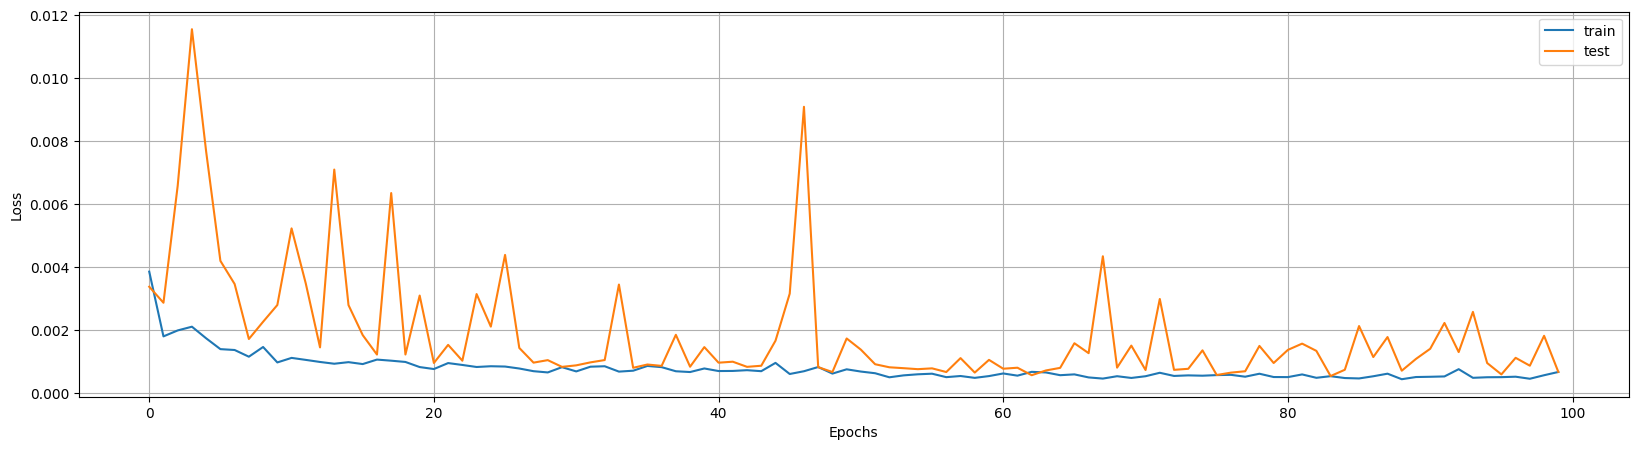

In [ ]:
# plot the training and testing loss
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()


# Prediction on Test Data

In [ ]:
# make predictions on the test data
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

20/20 [==============================] - 2s 8ms/step


# Graph of Predicted Data

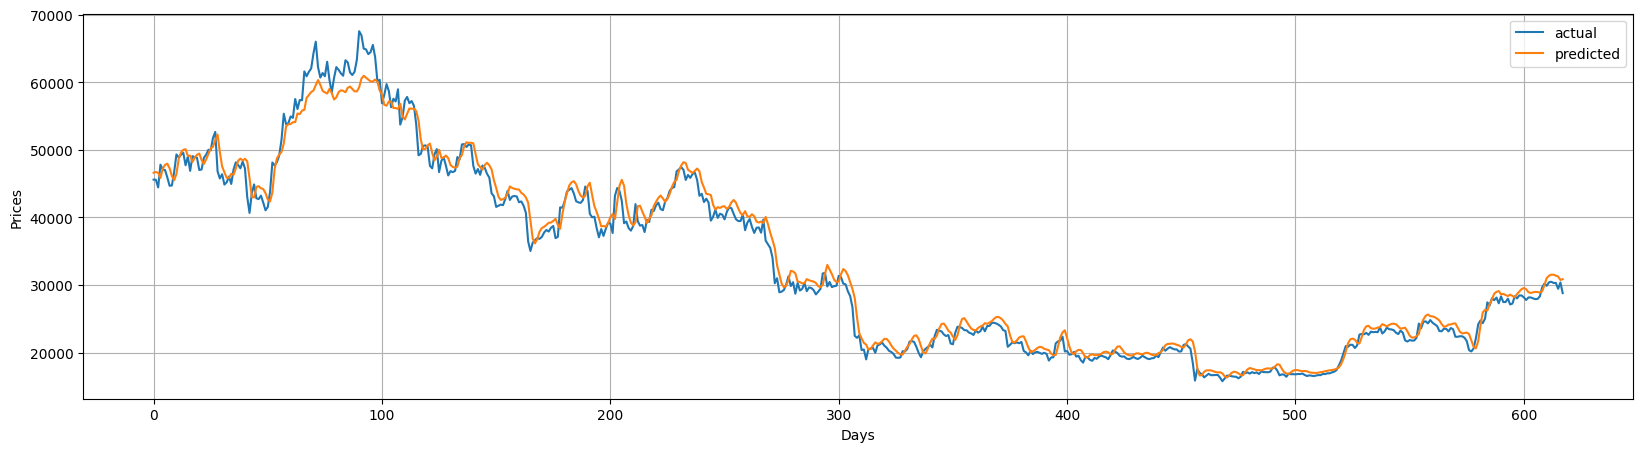

In [ ]:
# plot price
plt.figure(figsize=(20, 5))
plt.plot(y_test, label='actual')
plt.plot(y_pred, label='predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.grid()

# Calculation of RMSE and MAPE

In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

RMSE: 1731.7624606121271
MAPE: 3.843250920102798


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3133,2023-04-16,30315.976563,30555.537109,30157.832031,30315.355469,30315.355469,12854816417
3134,2023-04-17,30317.146484,30319.197266,29275.371094,29445.044922,29445.044922,17872186762
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421
